In [1]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


In [2]:
old_data_path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_old_customer_data.xlsx"

# old customers data: odf: 
odf = pd.read_excel(old_data_path)

In [3]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Unnamed: 0                           19408 non-null  int64         
 1   customer_id                          19408 non-null  int64         
 2   gender                               19408 non-null  object        
 3   past_3_years_bike_related_purchases  19408 non-null  int64         
 4   DOB                                  19408 non-null  datetime64[ns]
 5   job_title                            19408 non-null  object        
 6   job_industry_category                19408 non-null  object        
 7   wealth_segment                       19408 non-null  object        
 8   deceased_indicator                   19408 non-null  object        
 9   owns_car                             19408 non-null  object        
 10  tenure    

In [4]:
odf.head()

,Unnamed: 0,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,...,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482
1,1,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,...,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526
2,2,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,...,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823
3,3,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,...,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873
4,4,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Y,...,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573


In [5]:

import datetime as dt

odf['DOB'] = pd.to_datetime(odf['DOB'])
current_year = dt.datetime.now().year

odf['age'] = current_year - odf['DOB'].dt.year

print(odf[['DOB', 'age']])


             DOB  age
0     1953-10-12   70
1     1953-10-12   70
2     1953-10-12   70
3     1953-10-12   70
4     1953-10-12   70
...          ...  ...
19403 1967-07-21   56
19404 1967-07-21   56
19405 1967-07-21   56
19406 1967-07-21   56
19407 1967-07-21   56

[19408 rows x 2 columns]


In [6]:
odf['age'].min()

21

In [7]:
odf['age'].max()

92

In [8]:
# which gender purchased more bicycle ?
temp_view = odf.drop_duplicates(subset=['customer_id'])
temp_view[['gender', 'past_3_years_bike_related_purchases', 'age']]

,gender,past_3_years_bike_related_purchases,age
0,Female,93,70
11,Male,81,43
14,Male,33,62
16,Female,56,46
22,Male,35,57
...,...,...,...
19382,Male,99,37
19386,Female,73,37
19389,Female,28,28
19395,Male,29,44


### gender

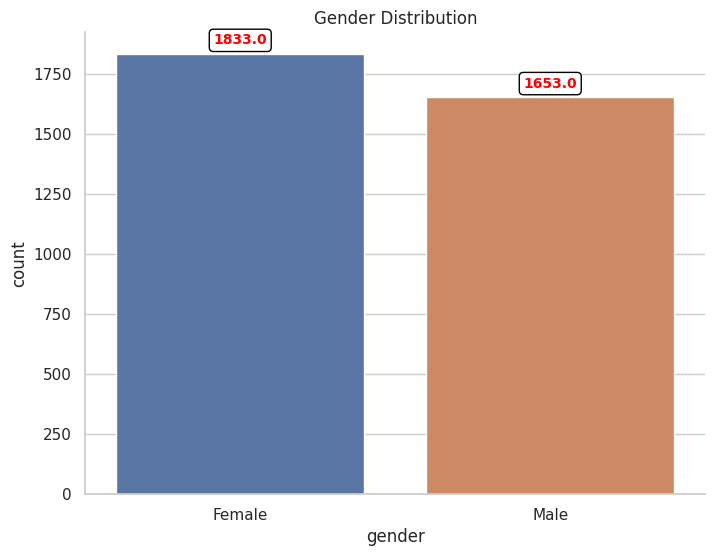

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='gender', data=temp_view)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Remove the spines (borders) for a cleaner look
sns.despine()

# Add title to the plot
plt.title('Gender Distribution')

# Display the plot
plt.show()

- slightly more females are buying bicycles than male customers. 

### wealth segment

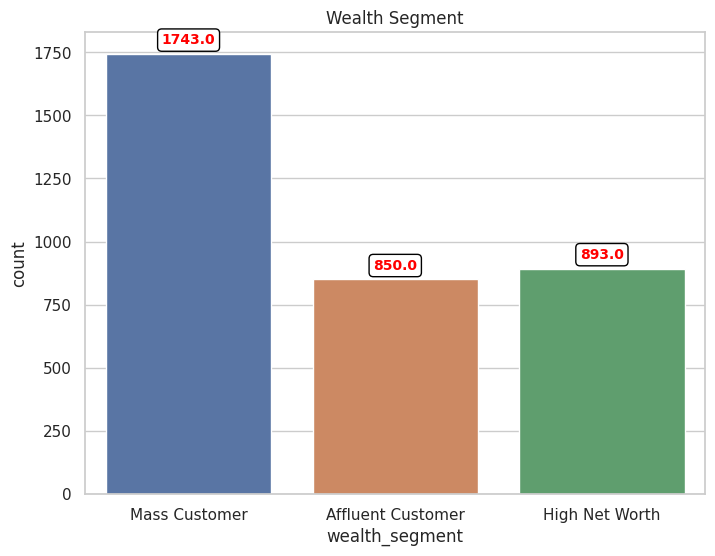

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='wealth_segment', data=temp_view)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Remove the spines (borders) for a cleaner look
# sns.despine()

# Add title to the plot
plt.title('Wealth Segment')

# Display the plot
plt.show()

Mass customers are significantly more that affluent customers and hight net worth customers. 

------

### owns car

In [11]:
# owns a car?
temp_view['owns_car'].value_counts()

owns_car
Y    1766
N    1720
Name: count, dtype: int64

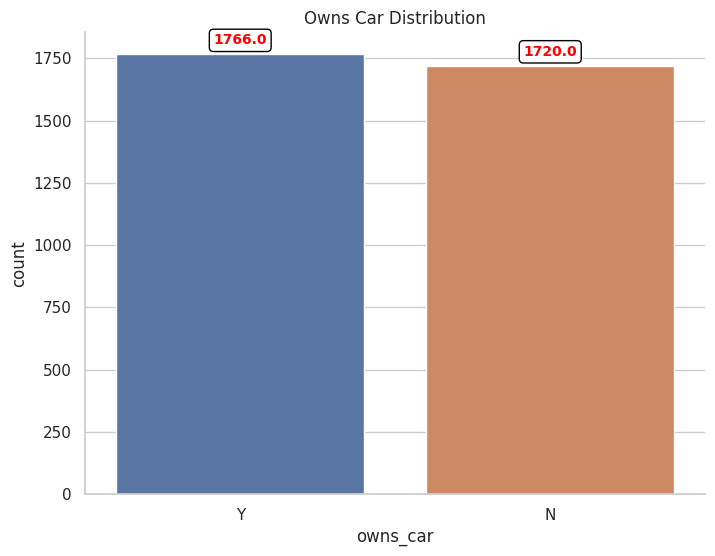

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='owns_car', data=temp_view)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Remove the spines (borders) for a cleaner look
sns.despine()

# Add title to the plot
plt.title('Owns Car Distribution')

# Display the plot
plt.show()

the difference between people with car or without car is negligible.

--------

### age 

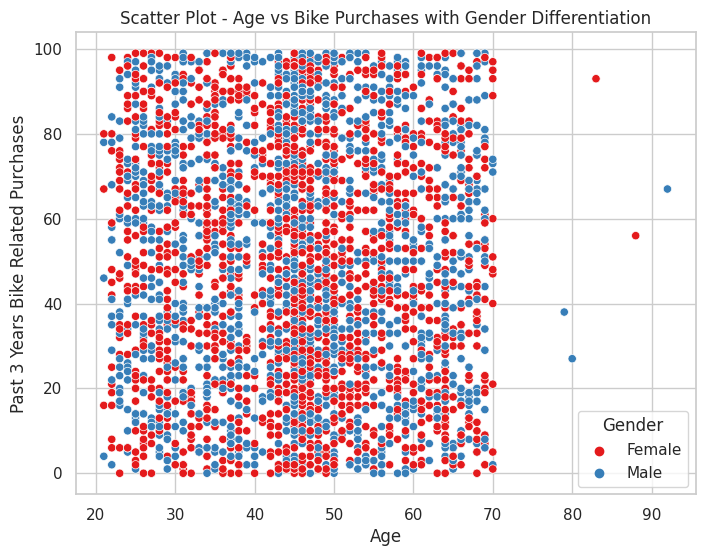

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='past_3_years_bike_related_purchases', data=temp_view, hue='gender', palette='Set1')
plt.title('Scatter Plot - Age vs Bike Purchases with Gender Differentiation')
plt.xlabel('Age')
plt.ylabel('Past 3 Years Bike Related Purchases')
plt.legend(title='Gender')
plt.show()


We can clearly say that our customers are from range of 20 to 70 with very few exceptions. 

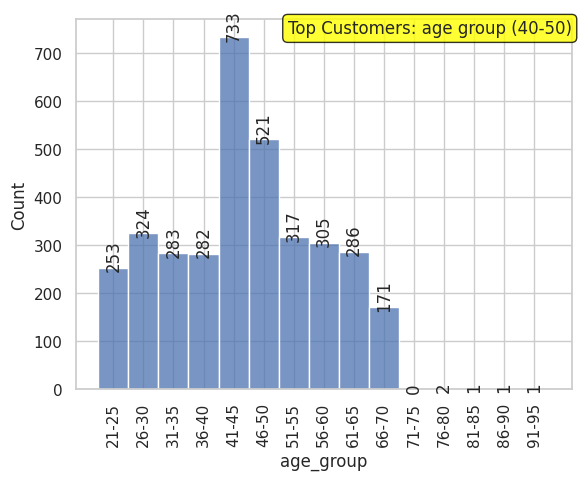

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'temp_view' is your DataFrame
min_age = temp_view['age'].min()
max_age = temp_view['age'].max()

# Calculate dynamic age bins
age_interval = 5
age_bins = range(min_age, max_age + age_interval + 1, age_interval)

# Create age ranges
temp_view['age_group'] = pd.cut(temp_view['age'], 
                                bins=age_bins, 
                                labels=[f'{start}-{end - 1}' for start, end in zip(age_bins[:-1], age_bins[1:])])

ax = sns.histplot(x='age_group', data=temp_view, bins=len(age_bins) - 1)

# Annotate each bar with its count, rotating the numbers vertically
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation='vertical')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)
# Add a text box at the top-right corner
plt.text(1, 1, f'Top Customers: age group (40-50)', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.show()


---------

### job and industry 

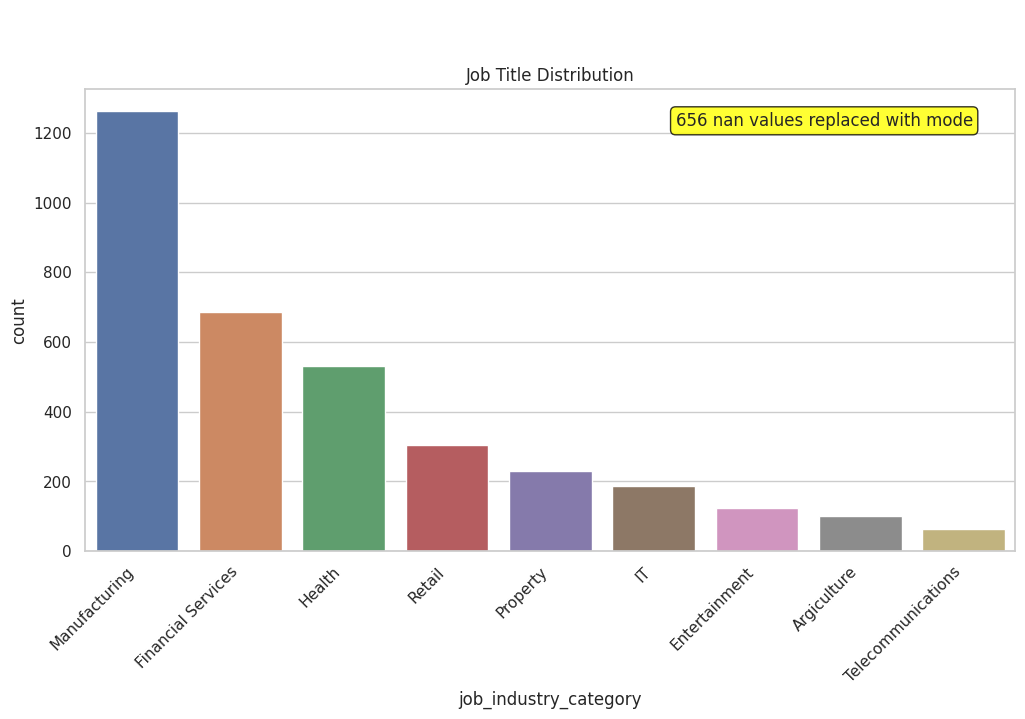

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_view, x='job_industry_category', order=temp_view['job_industry_category'].value_counts().index)
plt.title('Job Title Distribution')
plt.xticks(rotation=45, ha='right')
# Add a text box at the top-right corner
plt.text(1.8, 1.5, f'656 nan values replaced with mode', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))
plt.show()


----

### Transactions over time

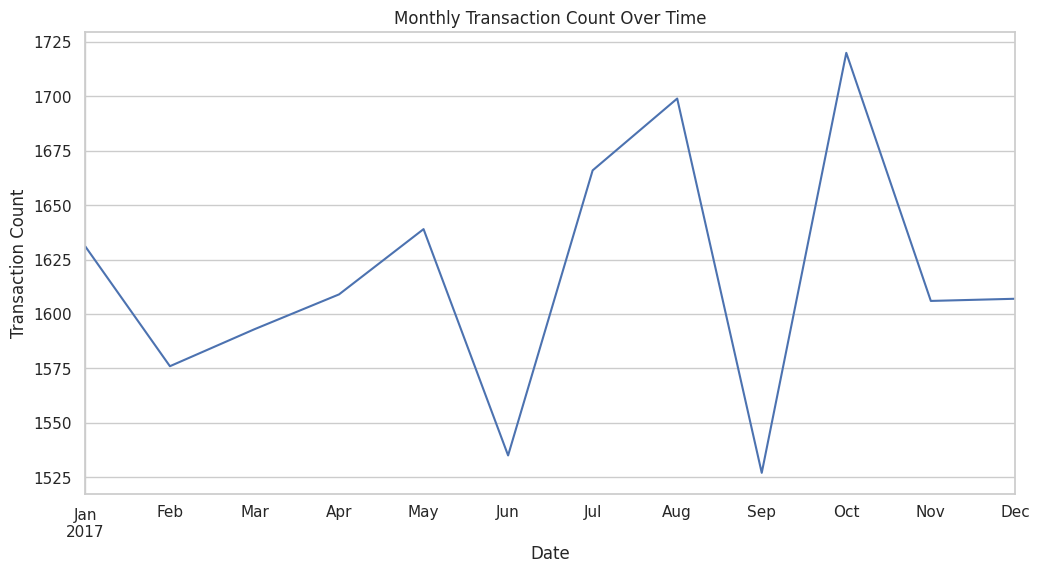

In [16]:
# Convert transaction_date to datetime
odf['transaction_date'] = pd.to_datetime(odf['transaction_date'])

# Plot transactions over time
plt.figure(figsize=(12, 6))
odf.set_index('transaction_date')['transaction_id'].resample('M').count().plot()
plt.title('Monthly Transaction Count Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()


-----

In [ ]:
odf.drop(labels="Unnamed: 0", inplace= True, axis = 1) # unnecessary column deleted. 
odf.info()

In [34]:
numerical_columns = odf.columns[odf.dtypes != 'object']
categorical_columns = odf.columns[odf.dtypes == 'object']

print(f"Numerical columns: {numerical_columns} \n-----------\ncategorical columns: {categorical_columns}")

Numerical columns: Index(['customer_id', 'past_3_years_bike_related_purchases', 'DOB', 'tenure',
       'postcode', 'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'list_price', 'standard_cost',
       'product_first_sold_date', 'age'],
      dtype='object') 
-----------
categorical columns: Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'full_name', 'address', 'state',
       'country', 'order_status', 'brand', 'product_line', 'product_class',
       'product_size'],
      dtype='object')


['past_3_years_bike_related_purchases', 'DOB', 'tenure', 'property_valuation', 'transaction_date', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date', 'age']


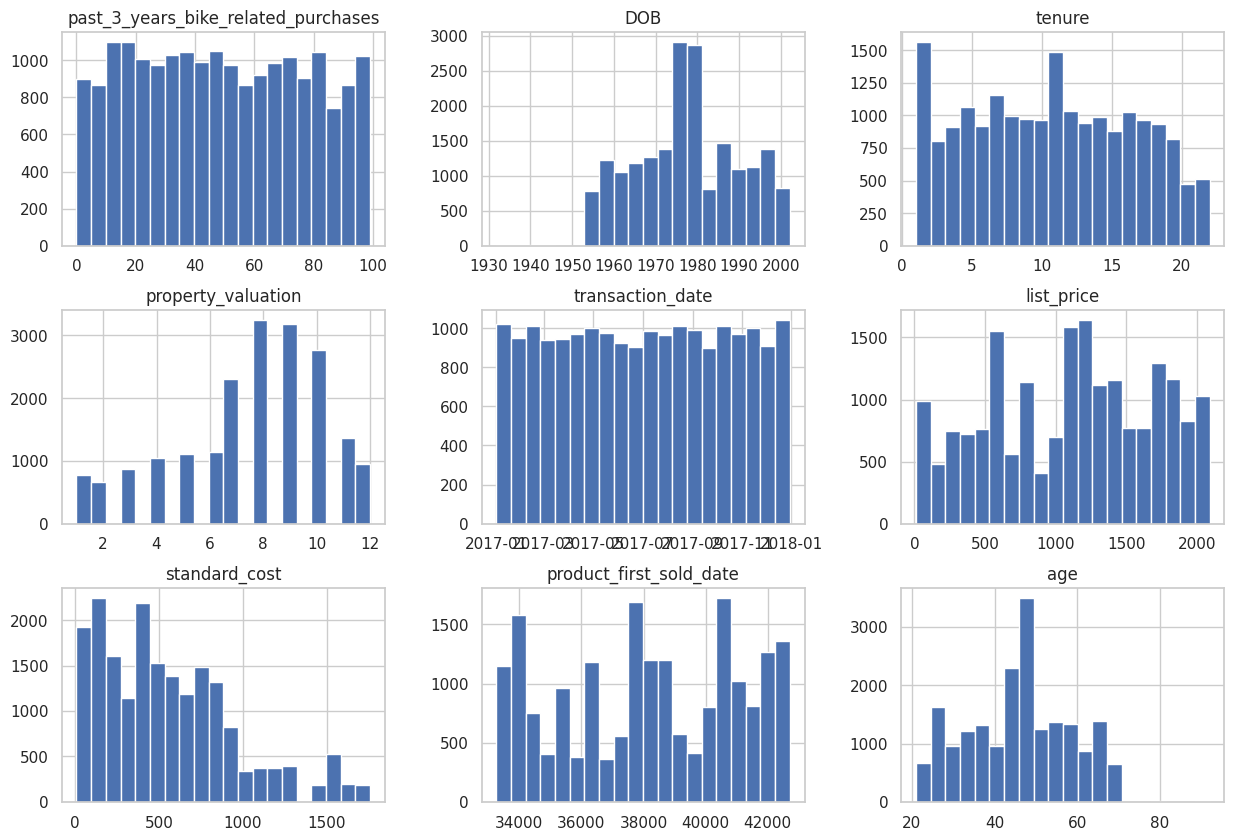

In [35]:
import matplotlib.pyplot as plt

numerical_features = list(numerical_columns)

elements_to_remove = ['customer_id', 'transaction_id', 'product_id', 'postcode']

for element in elements_to_remove:
    numerical_features.remove(element)
print(numerical_features)

odf[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()


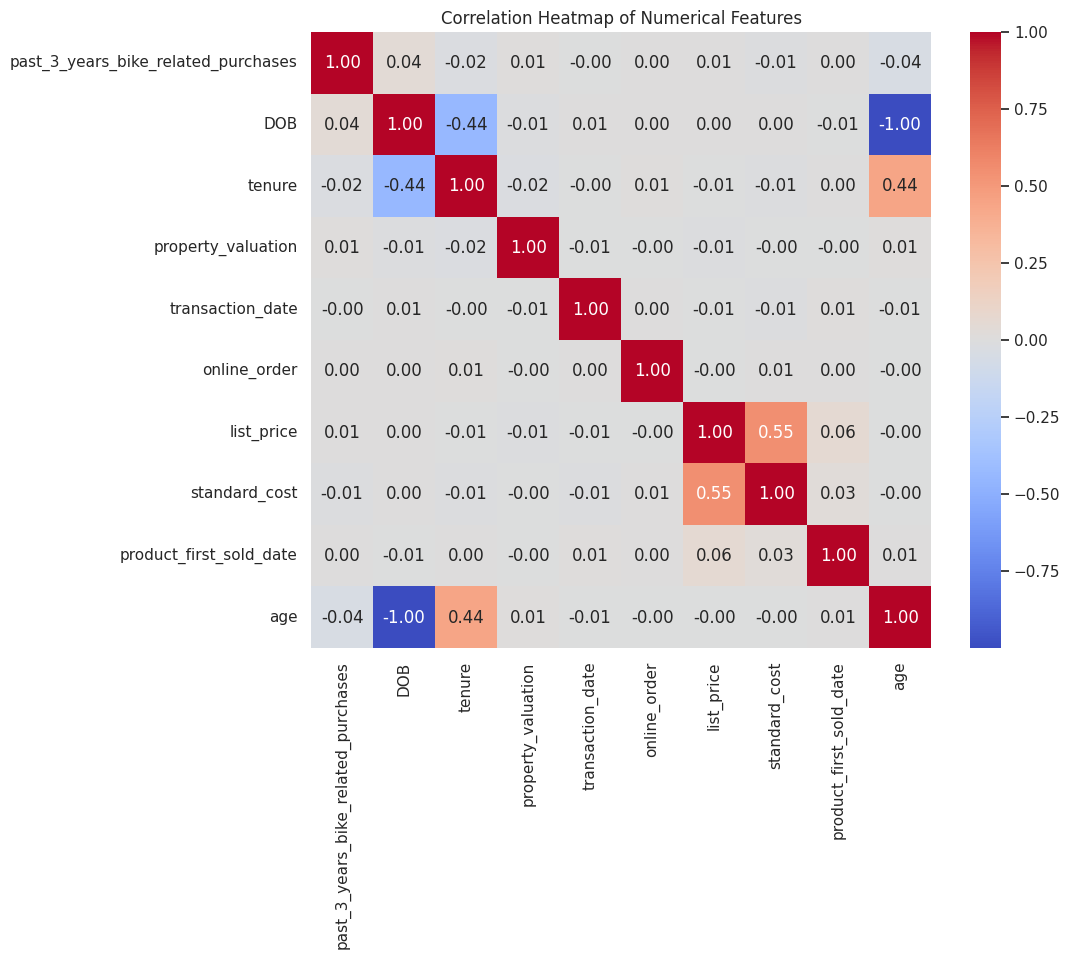

In [36]:
# Calculate correlation matrix
correlation_matrix = odf[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

- we can drop 'DOB' feature in our prediction process. 

- There is some positive correlation between `age` and `tenure`.

- for our analysis we can chose to consider `list_price` feature as deciding factor for valuable customers.

-------

### online order and order status 

In [ ]:
numerical_columns

Index(['customer_id', 'past_3_years_bike_related_purchases', 'DOB', 'tenure',
       'postcode', 'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'list_price', 'standard_cost',
       'product_first_sold_date', 'age'],
      dtype='object')

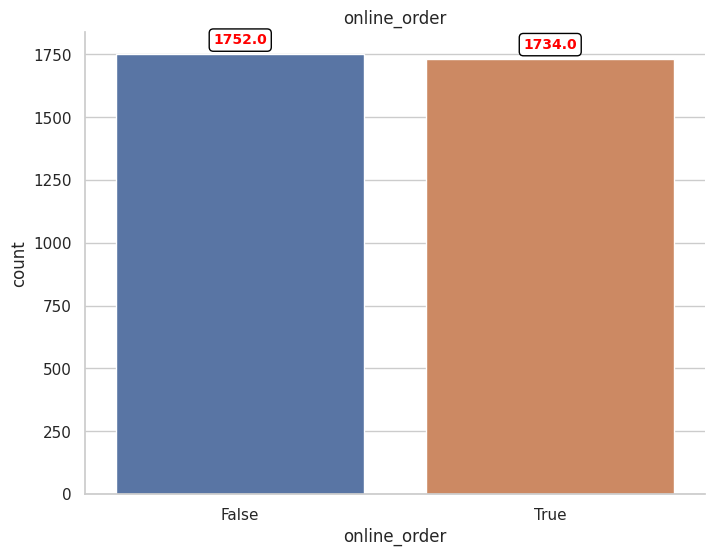

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='online_order', data=temp_view)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Remove the spines (borders) for a cleaner look
sns.despine()

# Add title to the plot
plt.title('online_order')

# Display the plot
plt.show()

In [ ]:
categorical_columns

Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'full_name', 'address', 'state',
       'country', 'order_status', 'brand', 'product_line', 'product_class',
       'product_size'],
      dtype='object')

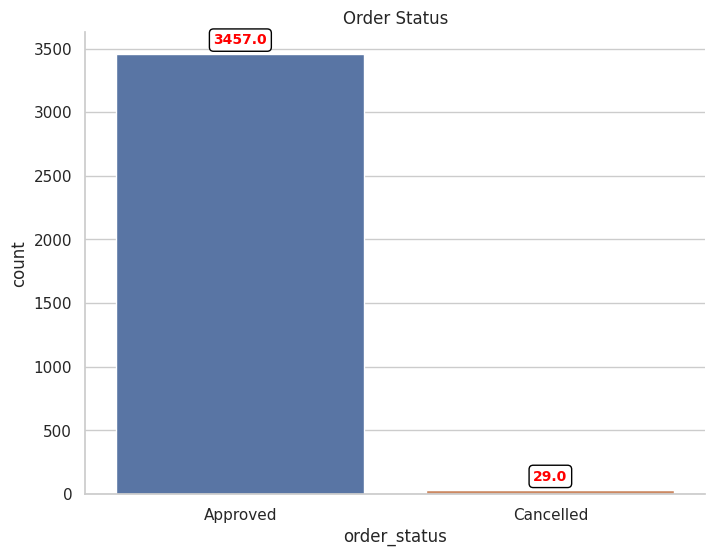

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='order_status', data=temp_view)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Remove the spines (borders) for a cleaner look
sns.despine()

# Add title to the plot
plt.title('Order Status')

# Display the plot
plt.show()

- negligible amount of orders were cancelled. 

--------

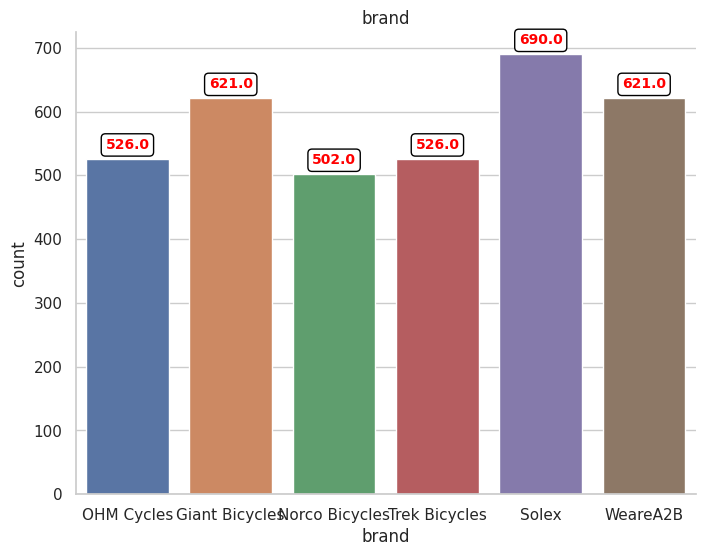

In [37]:
### Brand
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Customize Seaborn settings
sns.set_palette("pastel")  # Change the color palette
sns.set(style="whitegrid")  # Add grid lines

# Create a countplot using Seaborn
ax = sns.countplot(x='brand', data=temp_view)

# Add count numbers on top of each bar
for p in ax.patches: # to iterate over each bar in the count plot
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Remove the spines (borders) for a cleaner look
sns.despine()

# Add title to the plot
plt.title('brand')

# Display the plot
plt.show()


- All the brands have almost same sells. Solex is the most sold brand. 

--------